In [33]:
import pandas as pd
import numpy as np
import pickle
from StringContains import ContainedStringCase 
import seaborn as sns

In [2]:
def plot1(csv_names, file_figure, regex_len, type):
    df_all = pd.concat(map(pd.read_csv, csv_names))
    df_all["str:len"] = df_all["Param: str"].map(lambda x: len(x) if not pd.isnull(x) else 0)
    df_all["Benchmark"] = df_all["Benchmark"].map(lambda x: x.split(".")[-1])
    df = df_all[["Benchmark","Score","str:len"]].pivot(index="str:len",columns="Benchmark",values="Score")
    ax = df.plot.bar()
    ax.figure.savefig(file_figure)
    df['ratio'] = df['regexMatches'] / df['stringContains']
    df['regex:len'] = regex_len
    df['str:type'] = type
    print(file_figure)
    print(df)
    return df

0 6
0_matching.pdf
Benchmark   regexMatches  stringContains      ratio  regex:len str:type
str:len                                                                
5             133.214125        4.939147  26.971079          6        M
8             138.115678        9.002878  15.341281          6        M
132           774.510079       24.955096  31.036149          6        M
1297         4821.024614      195.235806  24.693342          6        M
12392       36497.641696     1850.416486  19.724015          6        M
125077     524960.641579    18944.864562  27.709918          6        M
0_dismatching_rm.pdf
Benchmark   regexMatches  stringContains      ratio  regex:len str:type
str:len                                                                
0              64.780095        4.941027  13.110654          6     N_RM
3              88.910489        4.941044  17.994272          6     N_RM
127           763.237288       25.716107  29.679348          6     N_RM
1292         7004.388687

4_dismatching_edit.pdf
Benchmark   regexMatches  stringContains       ratio  regex:len str:type
str:len                                                                 
500          3347.685503        4.938163  677.921224        604     N_ED
510          3099.466525        4.939179  627.526665        604     N_ED
576          3938.833814        4.937973  797.662080        604     N_ED
2173        12935.178613      234.258667   55.217503        604     N_ED
11566       63936.430665     1602.876495   39.888557        604     N_ED
117456     634840.702813    17595.814938   36.079074        604     N_ED
(6, 5) (6, 5) (6, 5) (18, 5)
5 1253
5_matching.pdf
Benchmark   regexMatches  stringContains        ratio  regex:len str:type
str:len                                                                  
1000         9325.736104        4.939225  1888.097040       1253        M
1010        11499.626284        4.938002  2328.801463       1253        M
1118        13410.435880        4.939772  2714

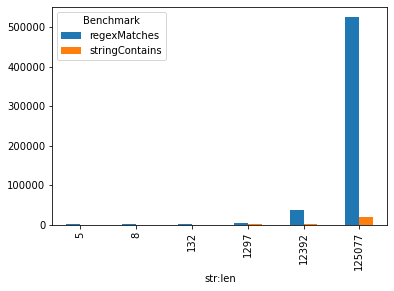

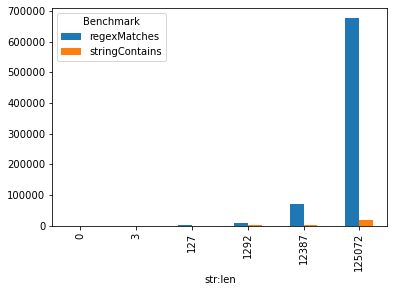

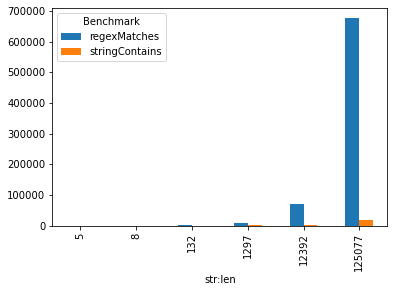

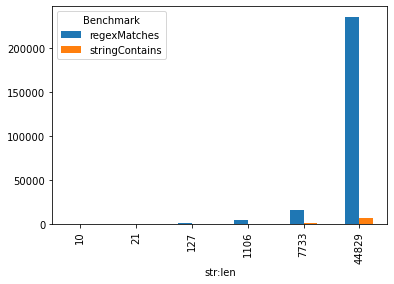

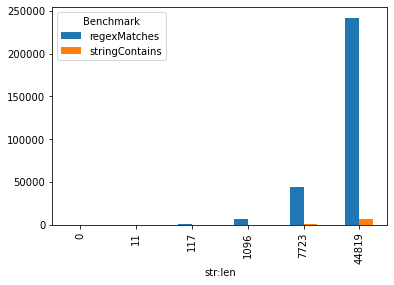

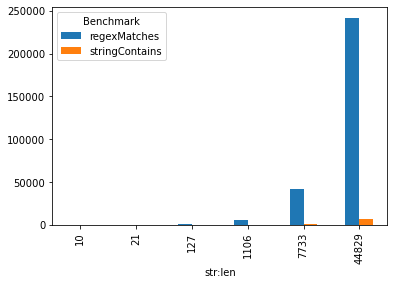

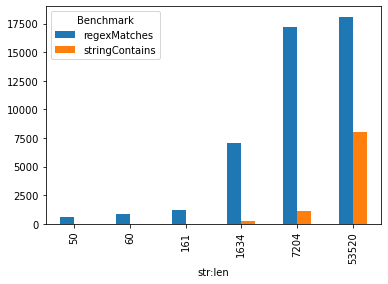

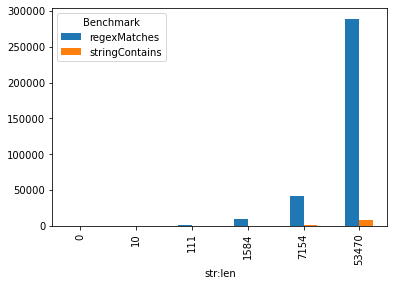

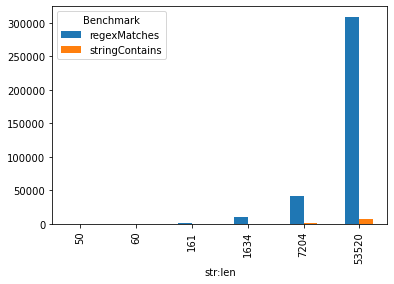

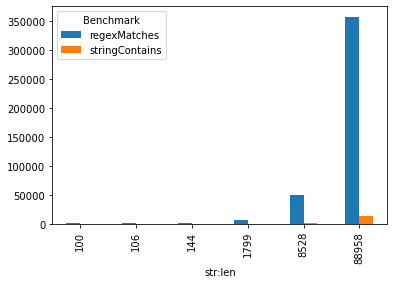

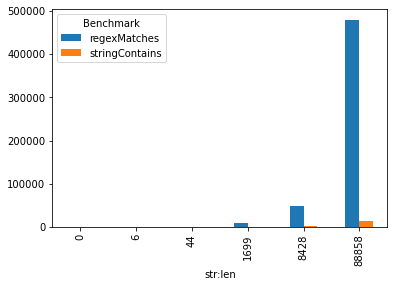

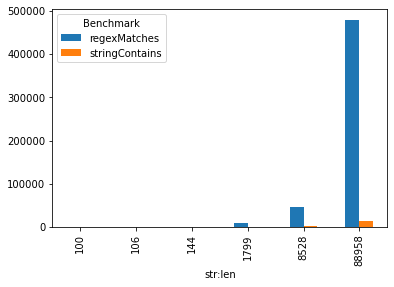

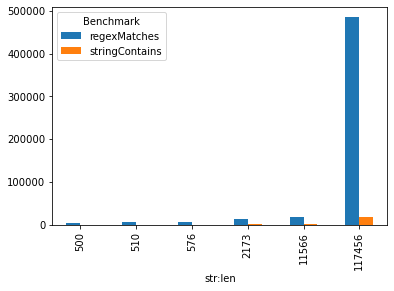

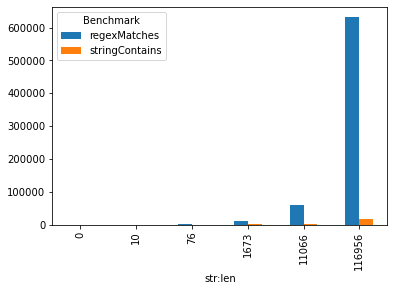

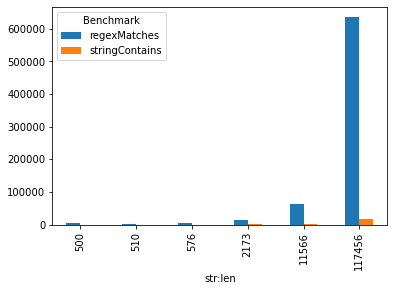

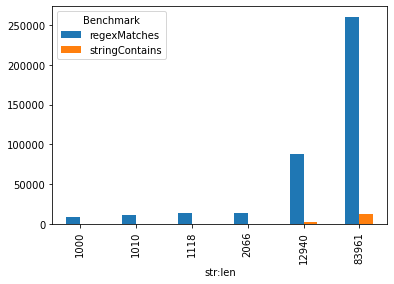

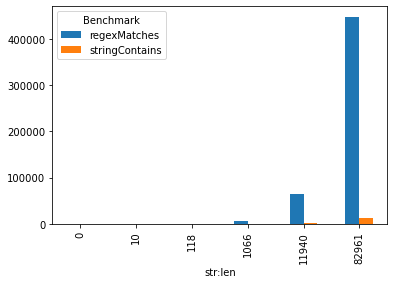

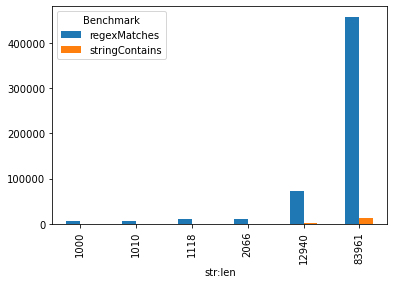

In [3]:
file_name = "string_contains.input"
results_dir = "stringcontains_results/"
cases = pickle.load(open(file_name, "rb"))
data = None
for case in cases:
    print(case.index, len(case.escaped_regex))
    string_count = 0
    csv_names_matching, csv_names_dismatching_rm, csv_names_dismatching_edit = [], [], []
    for s, (mis_rm, mis_edit) in case.str_to_match.items():
        csv_names_matching.append(results_dir+str(case.index)+"_"+str(string_count)+"_matching.csv")
        csv_names_dismatching_rm.append(results_dir+str(case.index)+"_"+str(string_count)+"_dismatching_rm.csv")
        csv_names_dismatching_edit.append(results_dir+str(case.index)+"_"+str(string_count)+"_dismatching_edit.csv")
        string_count += 1

    df1 = plot1(csv_names_matching, str(case.index)+"_matching.pdf", len(case.escaped_regex), "M")
    df2 = plot1(csv_names_dismatching_rm, str(case.index)+"_dismatching_rm.pdf", len(case.escaped_regex), "N_RM")
    df3 = plot1(csv_names_dismatching_edit, str(case.index)+"_dismatching_edit.pdf", len(case.escaped_regex), "N_ED")
    if data is not None:
        data.append(df1)
        data.append(df2)
        data.append(df3)
    else:
        data = pd.concat([df1,df2,df3])
    print(df1.shape,df2.shape, df3.shape, data.shape)
data.to_csv("stringcontains_data.csv")

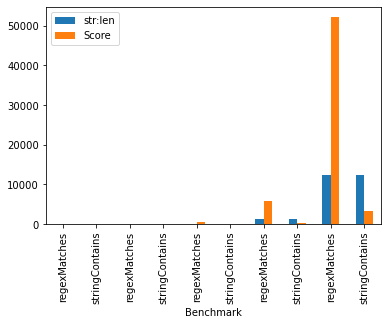

In [47]:

plotdata = df_all[["str:len","Score"]]
plotdata.index = df_all.str
# Plot a bar chart
plotdata.plot(kind="bar")

In [158]:
file_name = "stringcontains_data.csv"
df = pd.read_csv(file_name)
df

,str:len,regexMatches,stringContains,ratio,regex:len,str:type
0,5,133.214125,4.939147,26.971079,6,M
1,8,138.115678,9.002878,15.341281,6,M
2,132,774.510079,24.955096,31.036149,6,M
3,1297,4821.024614,195.235806,24.693342,6,M
4,12392,36497.641696,1850.416486,19.724015,6,M
5,125077,524960.641579,18944.864562,27.709918,6,M
6,0,64.780095,4.941027,13.110654,6,N_RM
7,3,88.910489,4.941044,17.994272,6,N_RM
8,127,763.237288,25.716107,29.679348,6,N_RM
9,1292,7004.388687,197.801579,35.411187,6,N_RM


In [115]:
getfun(csv_names_edit)

Benchmark   regexMatches  stringContains      ratio
str:len                                            
5             105.731683        3.650867  28.960705
8             129.980704        8.390663  15.491112
132           559.653223       38.439090  14.559482
1297         5707.854023      345.687004  16.511625
12392       72896.119109     3340.909363  21.819245
125077     803019.610771    35357.508736  22.711431


In [36]:
df_all.head()

,Benchmark,Score,str:len
0,regexMatches,118,5
1,stringContains,3,5
0,regexMatches,148,8
1,stringContains,8,8


Benchmark
regexMatches      AxesSubplot(0.125,0.125;0.775x0.755)
stringContains    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

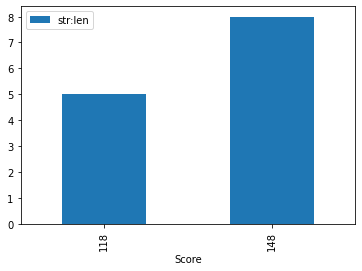

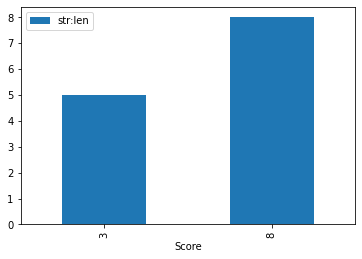

In [42]:
df_all.groupby("Benchmark").plot("Score",kind="bar")

In [53]:
df0.head()

,Benchmark,Mode,Threads,Samples,Score,Score Error (99.9%),Unit,Param: regex,Param: str
0,benchmark.StringContains.regexMatches,avgt,1,50,117.751127,1.178940,ns/op,\+D_NJ,+D_NJ
1,benchmark.StringContains.stringContains,avgt,1,50,3.365457,0.093267,ns/op,\+D_NJ,+D_NJ


In [56]:
t = df4 = pd.read_csv("0_4_matching.csv")
t.head()

Benchmark,regexMatches,stringContains
str:len,,
5,118,3
8,148,8
132,606,42
1297,5895,354
12392,52150,3403


In [11]:
df_all = pd.read_csv("df_all.csv")

In [12]:
df_all

,Unnamed: 0,Benchmark,Mode,Threads,Samples,Score,Score Error (99.9%),Unit,Param: regex,Param: str,str:len
0,0,regexMatches,avgt,1,50,133.214125,0.516636,ns/op,\+D_NJ,+D_NJ,5
1,1,stringContains,avgt,1,50,4.939147,0.001369,ns/op,\+D_NJ,+D_NJ,5
2,0,regexMatches,avgt,1,50,138.115678,0.126297,ns/op,\+D_NJ,Kon+D_NJ,8
3,1,stringContains,avgt,1,50,9.002878,0.009406,ns/op,\+D_NJ,Kon+D_NJ,8
4,0,regexMatches,avgt,1,50,774.510079,0.422158,ns/op,\+D_NJ,CZ0]Z/+!#BK#(g$s:/E ) L>A))DG^-S#3;<eqhfZ\6>!r...,132
5,1,stringContains,avgt,1,50,24.955096,0.003235,ns/op,\+D_NJ,CZ0]Z/+!#BK#(g$s:/E ) L>A))DG^-S#3;<eqhfZ\6>!r...,132
6,0,regexMatches,avgt,1,50,4821.024614,62.730822,ns/op,\+D_NJ,e\YHI5Mg[?Fe9.q4tck%pd)v^R_81x$JZ'-0#bc*7D;` Y...,1297
7,1,stringContains,avgt,1,50,195.235806,0.089641,ns/op,\+D_NJ,e\YHI5Mg[?Fe9.q4tck%pd)v^R_81x$JZ'-0#bc*7D;` Y...,1297
8,0,regexMatches,avgt,1,50,36497.641696,14.876827,ns/op,\+D_NJ,"H[!&bu6Z!X9H:SI!F#wxBA%Y_lfM=KFM/uf]i.s,)R=)YM...",12392
9,1,stringContains,avgt,1,50,1850.416486,0.959555,ns/op,\+D_NJ,"H[!&bu6Z!X9H:SI!F#wxBA%Y_lfM=KFM/uf]i.s,)R=)YM...",12392


In [19]:
data = pd.read_csv("data.csv")
data

,str:len,regexMatches,stringContains,ratio,regex:len,str:type
0,5,133.214125,4.939147,26.971079,6,M
1,8,138.115678,9.002878,15.341281,6,M
2,132,774.510079,24.955096,31.036149,6,M
3,1297,4821.024614,195.235806,24.693342,6,M
4,12392,36497.641696,1850.416486,19.724015,6,M
5,125077,524960.641579,18944.864562,27.709918,6,M
6,0,64.780095,4.941027,13.110654,6,N_RM
7,3,88.910489,4.941044,17.994272,6,N_RM
8,127,763.237288,25.716107,29.679348,6,N_RM
9,1292,7004.388687,197.801579,35.411187,6,N_RM


In [20]:
df = pd.DataFrame([[1, 2], [3, 4]], columns=list('AB'))

In [21]:
df

,A,B
0,1,2
1,3,4


In [22]:
df2 = pd.DataFrame([[5, 6], [7, 8]], columns=list('AB'))
df.append(df2)

,A,B
0,1,2
1,3,4
0,5,6
1,7,8


In [23]:
df

,A,B
0,1,2
1,3,4


In [24]:
df = pd.read_csv("stringcontains_data_matching.csv")
df

,str:len,regexMatches,stringContains,ratio,regex:len,str:type,str:pos
0,5,133.214125,4.939147,26.971079,6,M,0
1,8,138.115678,9.002878,15.341281,6,M,3
2,132,774.510079,24.955096,31.036149,6,M,64
3,1297,4821.024614,195.235806,24.693342,6,M,546
4,12392,36497.641700,1850.416486,19.724015,6,M,6558
5,125077,524960.641600,18944.864560,27.709918,6,M,37415
6,10,196.868071,4.940194,39.850271,12,M,0
7,21,323.441641,9.369837,34.519452,12,M,2
8,127,682.367241,24.967212,27.330534,12,M,69
9,1106,4400.144671,162.638464,27.054760,12,M,417


In [37]:
data = pd.DataFrame(np.random.rand(11, 5), columns=['A', 'B', 'C', 'D', 'E'], index = range(2000, 2011, 1))
data
# print(data.T)

,A,B,C,D,E
2000,0.374879,0.489832,0.976869,0.897297,0.131353
2001,0.174319,0.439848,0.256978,0.670335,0.147768
2002,0.896714,0.612606,0.787792,0.388592,0.679086
2003,0.883458,0.649870,0.704574,0.895313,0.275241
2004,0.382610,0.397550,0.123525,0.596509,0.512769
2005,0.479052,0.246443,0.364695,0.624681,0.761653
2006,0.340903,0.195285,0.907898,0.858824,0.684572
2007,0.541300,0.497626,0.831681,0.505160,0.054738
2008,0.301468,0.675256,0.433189,0.273409,0.926320
2009,0.483250,0.686539,0.010240,0.979003,0.934665


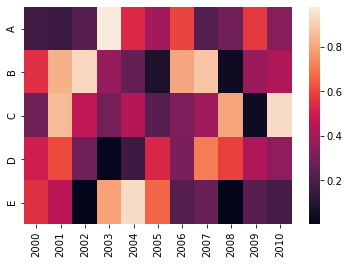

In [35]:
sns.heatmap(data.T)

In [39]:
df.columns

Index(['str:len', 'regexMatches', 'stringContains', 'ratio', 'regex:len',
       'str:type', 'str:pos'],
      dtype='object')

In [41]:
df[["str:len","stringContains","str:pos"]].pivot(index="str:len", columns="str:pos", values="stringContains")

str:pos,0,2,3,4,6,7,25,31,63,64,...,4491,5250,6558,9762,14013,29144,37120,37415,40811,50673
str:len,,,,,,,,,,,,,,,,,,,,,
5,4.939147,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,9.002878,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,4.940194,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21,NaN,9.369837,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50,5.271348,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60,NaN,NaN,NaN,NaN,NaN,8.831584,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100,4.981334,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
106,NaN,NaN,NaN,NaN,4.939323,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
127,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


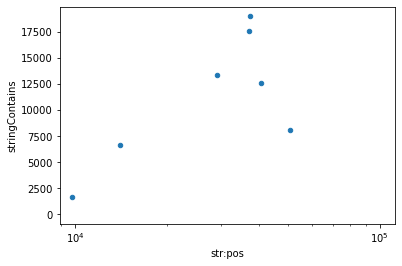

In [42]:
df.plot.scatter(x="str:pos",y="stringContains",logx=True)